<a href="https://colab.research.google.com/github/milanpavikevik/Skin-Lesion-Classification/blob/main/Skin_Types_center-crop-224-41%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import copy

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


testiraj golemina na slika 768x768 , 512x512 , 384x384 , 256x256 , 192x192

In [3]:
!mkdir '/content/experiment_dataset'
!mkdir '/content/experiment_dataset/train'
!mkdir '/content/experiment_dataset/val'

INPUT_DIR = '/content/drive/MyDrive/Skin-Lesion/**'

for folder in ['AK','BCC','BKL','DF','MEL','NV','SCC','VASC']:
  for f in ['train','val']:
    !mkdir '/content/experiment_dataset/'{f}'/'{folder}
from shutil import copyfile


for filename in glob.iglob(INPUT_DIR):
    kolkuPoKlasa=0
    print(filename)
    exc = 'train'
    isItShort=0

    list = os.listdir(filename) # dir is your directory path
    number_files = len(list)
    
    if (number_files<1100):
      isItShort=1
    print('dali e ? : ',number_files,' ',isItShort)

    for f in glob.iglob(filename+'/**'):
      
      if (kolkuPoKlasa >900):
        exc='val'

      if (kolkuPoKlasa > 1100):
        kolkuPoKlasa=0
        break

      if (isItShort==1):
        for i in range(0,4):
          kolkuPoKlasa+=1
      
          image= cv2.imread( f, cv2.COLOR_BGR2RGB)
          if (i!=0):
            image = cv2.rotate(image, cv2.cv2.ROTATE_90_CLOCKWISE) 
          strign = 'experiment_dataset/'+exc
          dest = f.replace('drive/MyDrive/Skin-Lesion', strign)
          dest = dest.split('\.')[0] + str(i) + '.jpg'
          copyfile(f, dest)
      else:
        kolkuPoKlasa+=1
        image= cv2.imread( f, cv2.COLOR_BGR2RGB)
         
        strign = 'experiment_dataset/'+exc
        dest = f.replace('drive/MyDrive/Skin-Lesion', strign)
        copyfile(f, dest)  
      
      #print(f)
      #print(dest)
     
            


/content/drive/MyDrive/Skin-Lesion/VASC
dali e ? :  253   1
/content/drive/MyDrive/Skin-Lesion/SCC
dali e ? :  628   1
/content/drive/MyDrive/Skin-Lesion/NV
dali e ? :  12875   0
/content/drive/MyDrive/Skin-Lesion/AK
dali e ? :  867   1
/content/drive/MyDrive/Skin-Lesion/BCC
dali e ? :  3331   0
/content/drive/MyDrive/Skin-Lesion/BKL
dali e ? :  2624   0
/content/drive/MyDrive/Skin-Lesion/DF
dali e ? :  239   1
/content/drive/MyDrive/Skin-Lesion/MEL
dali e ? :  4522   0


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 5)
matplotlib.rcParams['font.size'] = 12
from matplotlib import pyplot as plt

num_classes = 8

xlass=[]

for row in dataset:
  xlass.append(row[1])
print(len(xlass))
xlass = pd.DataFrame(xlass)

class_counts = xlass.value_counts()

cmap = plt.cm.get_cmap(plt.cm.Set3, 10)
colors = [cmap(i) for i in range(num_classes)]
class_ticks = ['NV','MEL','BKL','BCC','AK','SCC','VASC','DF']
plt.barh(range(num_classes)[::-1], class_counts, tick_label=class_ticks,
         color=colors)
plt.title('Class distribution of dataset')
plt.show()

xlass=[]


NameError: ignored

cpu
images-size: torch.Size([64, 3, 224, 224])
out-size: torch.Size([3, 1810, 1810])


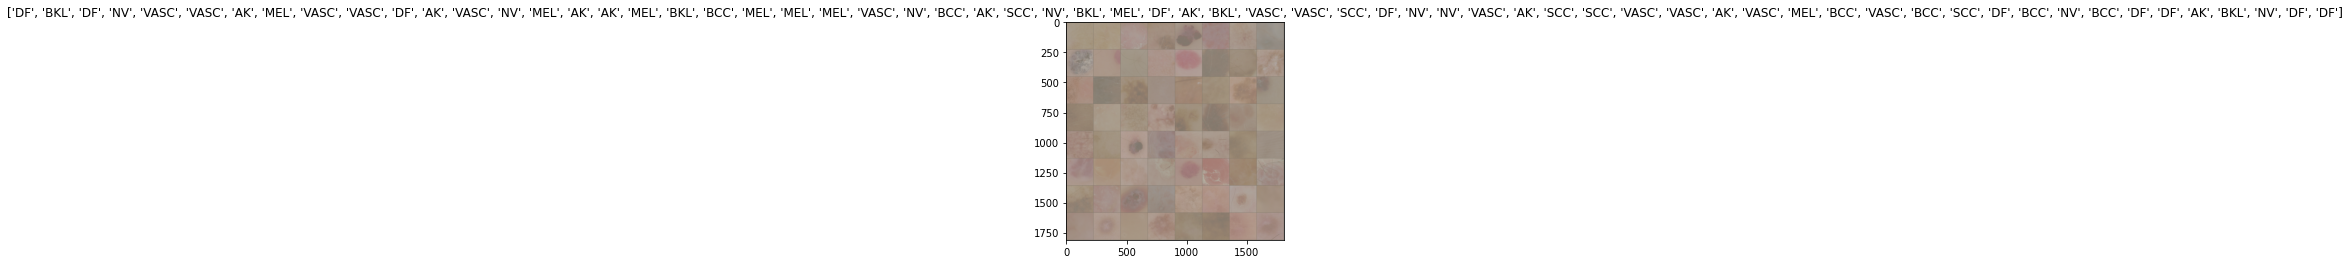

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



Epoch 1

Epoch [1/20], Step [0/113], Loss: 5.0551
Epoch [1/20], Step [20/113], Loss: 4.6787
Epoch [1/20], Step [40/113], Loss: 4.2098
Epoch [1/20], Step [60/113], Loss: 3.6399
Epoch [1/20], Step [80/113], Loss: 3.2013
Epoch [1/20], Step [100/113], Loss: 3.1749

train-loss: 3.8567, train-acc: 26.4681
validation loss: 4.1822, validation acc: 29.3382

Improvement-Detected, save-model
Epoch 2

Epoch [2/20], Step [0/113], Loss: 2.4560
Epoch [2/20], Step [20/113], Loss: 2.4976
Epoch [2/20], Step [40/113], Loss: 2.3410
Epoch [2/20], Step [60/113], Loss: 2.1486
Epoch [2/20], Step [80/113], Loss: 1.8827
Epoch [2/20], Step [100/113], Loss: 2.2804

train-loss: 3.0482, train-acc: 56.1496
validation loss: 4.0560, validation acc: 33.3088

Improvement-Detected, save-model
Epoch 3

Epoch [3/20], Step [0/113], Loss: 1.8706
Epoch [3/20], Step [20/113], Loss: 1.3024
Epoch [3/20], Step [40/113], Loss: 1.6622
Epoch [3/20], Step [60/113], Loss: 1.3216
Epoch [3/20], Step [80/113], Loss: 1.6394
Epoch [3/20],

In [4]:
from torch.utils.data import Dataset, DataLoader
from torchvision import *
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor()
    
    ]),
}


batch_size = 64
learning_rate = 0.001

data_dir = '/content/drive/MyDrive/Skin-Lesion/'



train_dataset = datasets.ImageFolder(root='/content/experiment_dataset/train', transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(root='/content/experiment_dataset/val', transform=data_transforms['val'])

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)




if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)
def imshow(inp, title=None):
    
    inp = inp.cpu() if device else inp
    inp = inp.numpy().transpose((1, 2, 0))
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    
images, labels = next(iter(train_dataloader)) 
print("images-size:", images.shape)

out = torchvision.utils.make_grid(images)
print("out-size:", out.shape)

imshow(out, title=[train_dataset.classes[x] for x in labels])


net = models.resnet18(pretrained=True)
if (device=='cuda'):
  net.to('cuda:0')


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 128)
#net.fc = net.fc.cuda() 

n_epochs = 20
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(train_dataloader)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_, target_) in enumerate(train_dataloader):
        data_, target_ = data_.to(device), target_.to(device)
        optimizer.zero_grad()
        
        outputs = net(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net.eval()
        for data_t, target_t in (test_dataloader):
            data_t, target_t = data_t.to(device), target_t.to(device)
            outputs_t = net(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t/total_t)
        val_loss.append(batch_loss/len(test_dataloader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')

        
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(net.state_dict(), 'resnet.pt')
            print('Improvement-Detected, save-model')
    net.train()

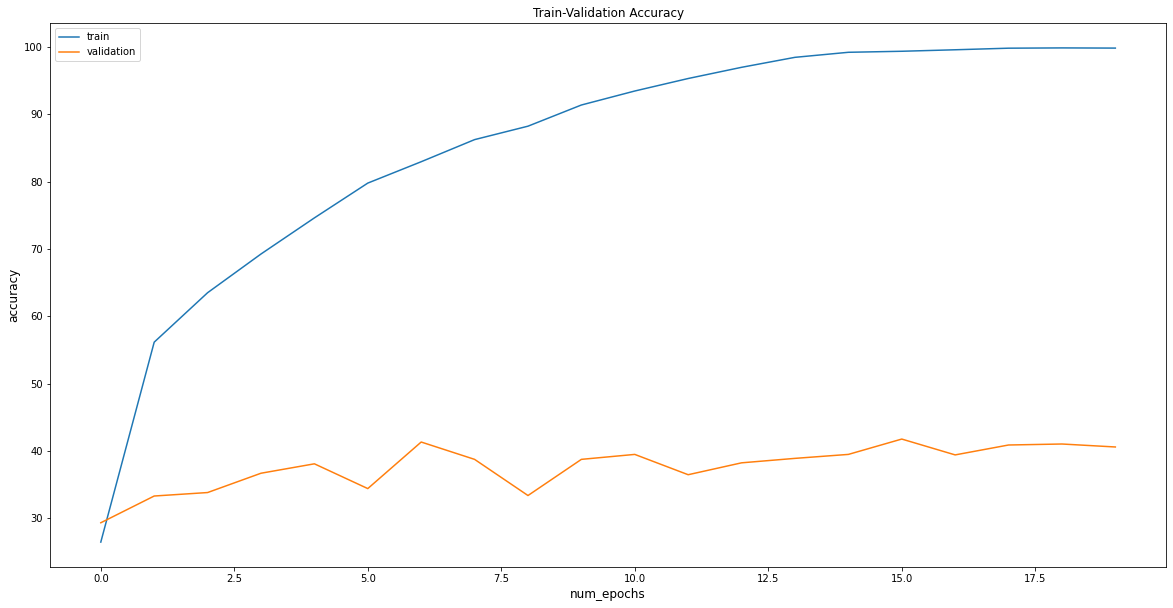

In [5]:
fig = plt.figure(figsize=(20,10))
plt.title("Train-Validation Accuracy")
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')

In [ ]:
y_pred_list = []
y_true = []
with torch.no_grad():
    net.eval()
    for X_batch, true_ones in test_dataloader:
        X_batch = X_batch.to(device)
        y_test_pred = net(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
        y_true.append(true_ones)
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
print(classification_report(y_true, y_pred_list))

ValueError: ignored

hyper-tuning

In [ ]:
vgg_features_test = pretrained_model.predict(x_test)

predictions = model2.predict(vgg_features_test, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

19/19 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          AK       0.41      0.54      0.46        59
         BCC       0.32      0.69      0.44        52
         BKL       0.47      0.43      0.45       113
          DF       0.27      0.29      0.28        31
         MEL       0.44      0.60      0.51        67
          NV       0.61      0.38      0.47       162
         SCC       0.44      0.38      0.41        69
        VASC       0.73      0.35      0.47        46

    accuracy                           0.45       599
   macro avg       0.46      0.46      0.44       599
weighted avg       0.49      0.45      0.45       599

